## Import Libraries

In [21]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from src.eda_fx import download_kaggle_dataset, load_data, plot_emotion_distribution, waveplot, spectogram
from src.constants import DATA_DIR

## Download and Load dataset

In [2]:
# Download dataset to /data/raw

download_kaggle_dataset("uwrfkaggler/ravdess-emotional-speech-audio")

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
Dataset 'uwrfkaggler/ravdess-emotional-speech-audio' downloaded and extracted to '/Users/silvanoquarto/Desktop/PROJECTS/Speech-Emotion-Recognition-model-and-gui/data/raw/'.


In [2]:
# Load dataset

df = load_data(DATA_DIR)
df.head()

,path,emotion
0,../data/raw/Actor_16/03-01-05-01-02-01-16.wav,angry
1,../data/raw/Actor_16/03-01-06-01-02-02-16.wav,fearful
2,../data/raw/Actor_16/03-01-06-02-01-02-16.wav,fearful
3,../data/raw/Actor_16/03-01-05-02-01-01-16.wav,angry
4,../data/raw/Actor_16/03-01-07-01-01-01-16.wav,disgust


## Exploratory Data Analysis

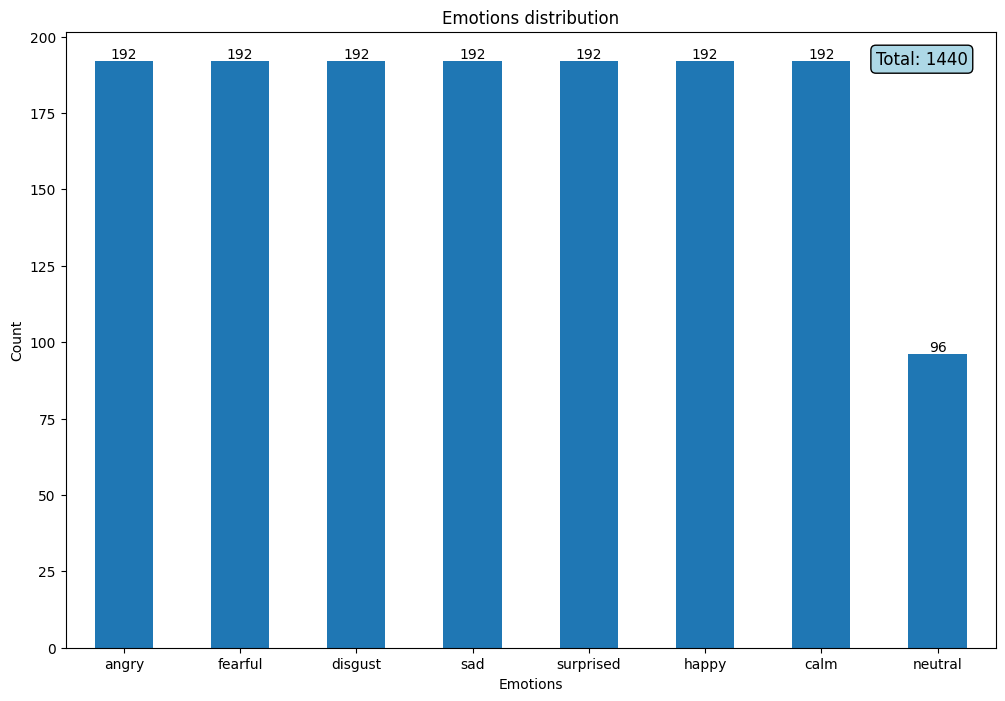

In [22]:
# Emotions distribution analysis

fig = plot_emotion_distribution(df)
fig.show()

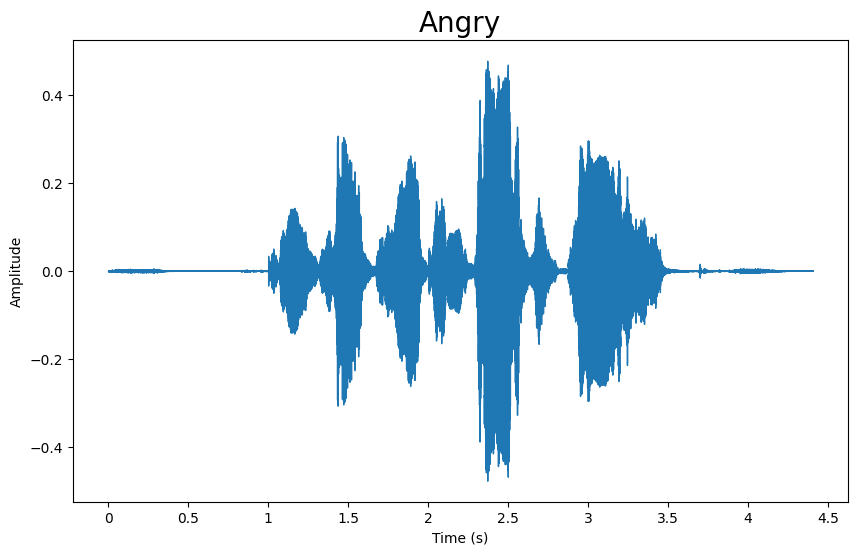

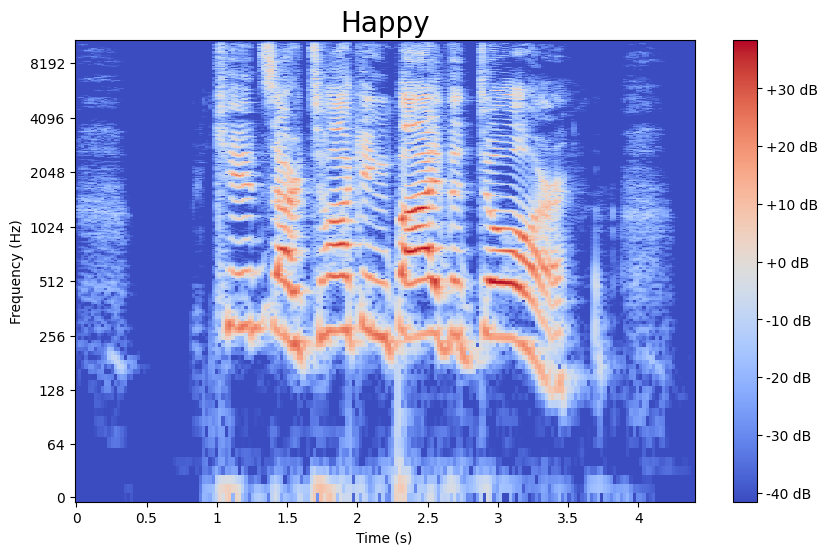

In [53]:
# Show waveplot, spectrogram and audio file from a random audio path

audio = np.random.randint(0,df.shape[0])
data, sampling_rate = librosa.load(df['path'][audio])
waveplot(data, sampling_rate, df['emotion'][0], play_audio=False)
spectogram(data, sampling_rate, emotion=df['emotion'][audio])
Audio(data=data, rate=sampling_rate)

## Feature Extraction

In [ ]:
def extract_features(file_path):
    audio, sr = librosa.load(file_path, duration=3, sr=22050)
    mfcc = librosa.feature.mfcc(y=audio, sr = sr, n_mfcc=20)
    return np.mean(mfcc.T, axis=0)

df['features'] = df['path'].apply(extract_features)
X = np.array(df['features'].tolist())
y = df['emotion']

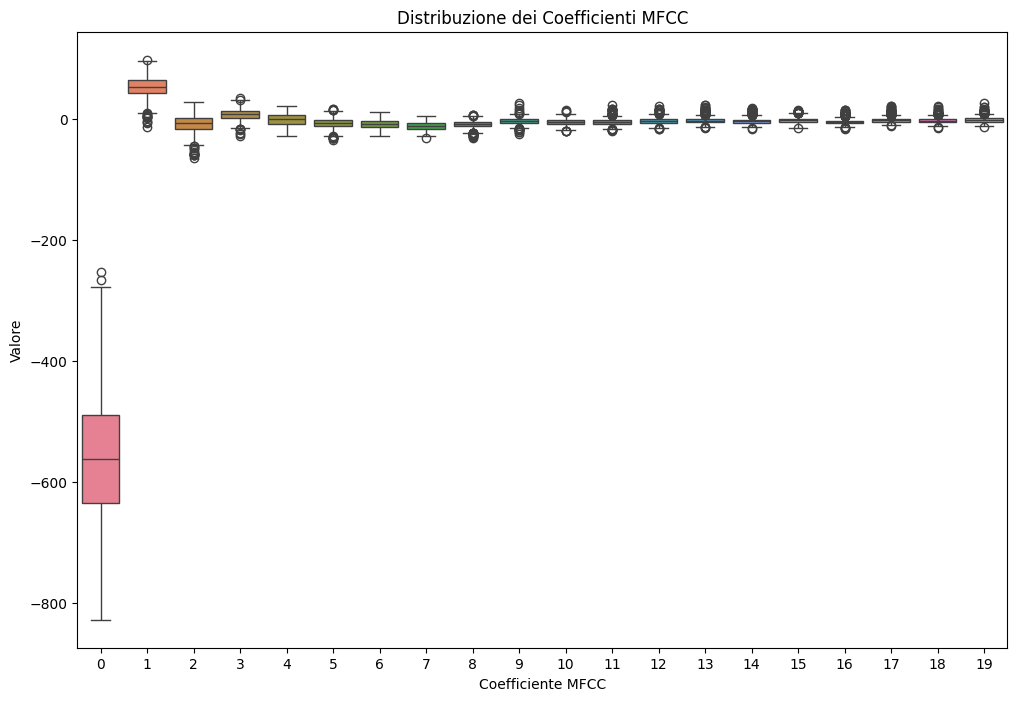

In [18]:
# Visualizzazione delle caratteristiche MFCC
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Distribuzione dei Coefficienti MFCC')
plt.xlabel('Coefficiente MFCC')
plt.ylabel('Valore')
plt.show()

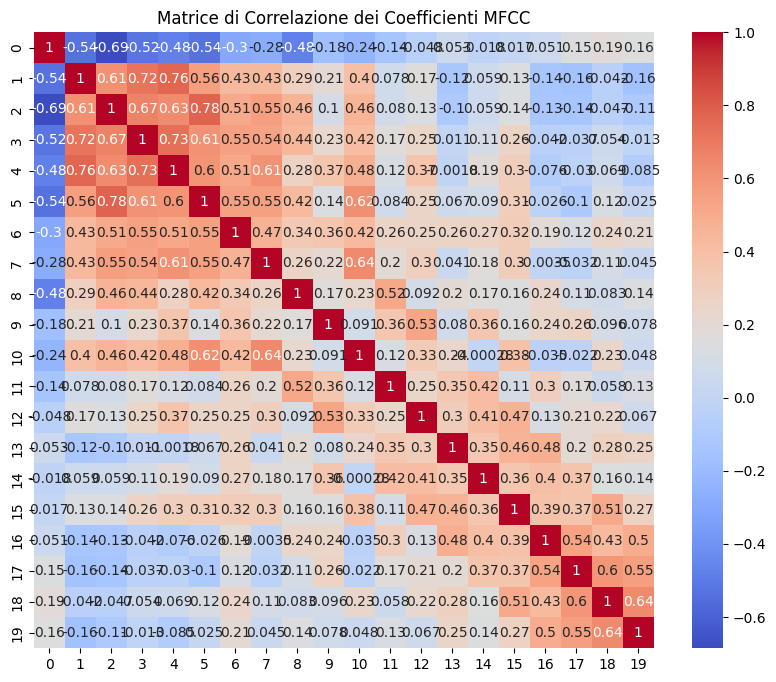

In [20]:
# Analisi della correlazione tra le caratteristiche
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione dei Coefficienti MFCC')
plt.show()